<a href="https://colab.research.google.com/github/niroshank/asp-dotnet-mvc-l10n-app/blob/master/Section_B_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import modules
import string
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from google.colab import files

In [0]:
# import dataset
uploaded=files.upload()

Saving spam.csv to spam.csv


In [0]:
# create dataframe
df=pd.read_csv('spam.csv',  encoding = "ISO-8859-1")
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df = df.rename(columns={'v1': 'class','v2': 'text'})
df.head(5)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.groupby('class').describe()

text                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

from above information, we know that:

1.   only about 15% of the text messages is classified as a spam
2.   there are some duplicate messages, since the number of unique values lower than the count values of the text

in the next part, lext check the length of each text messages to see whether it is correlated with the text classified as a spam or not.

In [0]:
df['length'] = df['text'].apply(len)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cf2d65748>,
      dtype=object)

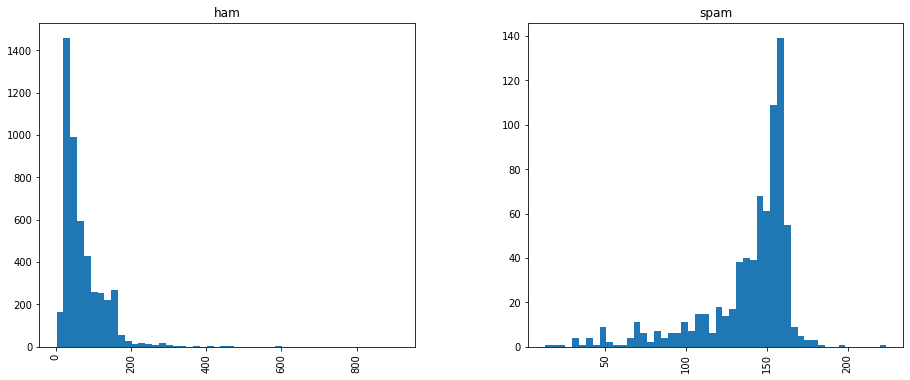

In [0]:
df.hist(column='length',by='class',bins=50, figsize=(15,6))

from above figure, we can see that most of ham (or not spam) messages only have length under 200 (100 to be exact) while spam messages tend to have higher lentgh above 130 or 140 approximately.

**PART 2: CREATE TOKENIZER**

In [0]:
def process_text(text):

    # Remove punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    # Remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #Return list of clean text words
    return clean_words

In [0]:
# call the text clean function
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

df['text'].apply(process_text).head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

**PART 3: SPLITTING DATASET**

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.2)

print("train inputs: ",len(X_train))
print("train ouputs: ",len(y_train))
print("test inputs: ",len(X_test))
print("test outputs: ",len(y_test))

train inputs:  4457
train ouputs:  4457
test inputs:  1115
test outputs:  1115


**PART 4: DATA PREPROCESSING AND MODEL CREATION**

In [0]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=process_text)), # converts strings to integer counts
    ('tfidf',TfidfTransformer()), # converts integer counts to weighted TF-IDF scores
    ('classifier',MultinomialNB()) # train on TF-IDF vectors with Naive Bayes classifier
])

**PART 6: TESTING**

In [0]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function process_text at 0x7f2cf262b598>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
# test accuracy
pipeline.score(X_test, y_test)

0.9659192825112107

In [0]:
predictions = pipeline.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       973
        spam       1.00      0.73      0.85       142

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



In [0]:
import numpy as np 

data = np.array(['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005'])
sampleSeries = pd.Series(data)
outputArray = pipeline.predict(sampleSeries)

print("This message is a",outputArray[0].upper())

This message is a SPAM


Text(69.0, 0.5, 'Truth')

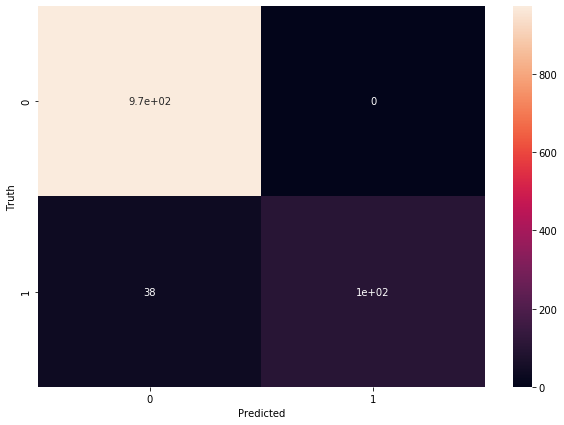

In [0]:
# ploting a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_predicted=pipeline.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)

import seaborn as sn # to create a heatmap
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')